In [14]:
import pandas as pd
pd.options.display.max_columns = None
import numpy as np

# librerías de visualización
import seaborn as sns
import matplotlib.pyplot as plt

# soporte para limpieza
import sys
sys.path.append("../")

import src.soporte as sp

import warnings
warnings.filterwarnings('ignore')

plt.rcParams["figure.figsize"] = (15,10)

In [15]:
df_train = pd.read_csv("../data/train.csv")

In [17]:
df_train.head()

,id,carat,cut,color,clarity,depth,table,x,y,z,price
0,0,0.30,Premium,D,SI2,62.4,58.0,4.31,4.28,2.68,6.353
1,1,1.01,Ideal,E,VVS2,62.7,56.0,6.42,6.46,4.04,9.183
2,2,0.72,Ideal,F,VS2,61.8,59.0,5.71,5.74,3.54,7.983
3,3,1.08,Very Good,G,SI2,63.2,57.0,6.54,6.50,4.12,8.371
4,4,0.36,Premium,G,VS1,62.3,59.0,4.50,4.55,2.82,6.588


In [18]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40455 entries, 0 to 40454
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       40455 non-null  int64  
 1   carat    40455 non-null  float64
 2   cut      40455 non-null  object 
 3   color    40455 non-null  object 
 4   clarity  40455 non-null  object 
 5   depth    40455 non-null  float64
 6   table    40455 non-null  float64
 7   x        40455 non-null  float64
 8   y        40455 non-null  float64
 9   z        40455 non-null  float64
 10  price    40455 non-null  float64
dtypes: float64(7), int64(1), object(3)
memory usage: 3.4+ MB


In [19]:
df_train.isnull().count()

id         40455
carat      40455
cut        40455
color      40455
clarity    40455
depth      40455
table      40455
x          40455
y          40455
z          40455
price      40455
dtype: int64

In [20]:
df_train.describe(include = "object").T

,count,unique,top,freq
cut,40455,5,Ideal,16230
color,40455,7,G,8410
clarity,40455,8,SI1,9779


In [21]:
df_train.describe().T

,count,mean,std,min,25%,50%,75%,max
id,40455.0,20227.000000,11678.496907,0.000,10113.500,20227.00,30340.500,40454.000
carat,40455.0,0.797576,0.475939,0.200,0.400,0.70,1.040,5.010
depth,40455.0,61.746377,1.436796,43.000,61.000,61.80,62.500,79.000
table,40455.0,57.451694,2.234569,44.000,56.000,57.00,59.000,95.000
x,40455.0,5.729163,1.125244,0.000,4.710,5.69,6.540,10.740
y,40455.0,5.732896,1.154799,0.000,4.720,5.70,6.540,58.900
z,40455.0,3.537351,0.711002,0.000,2.910,3.52,4.030,31.800
price,40455.0,7.783822,1.016828,5.787,6.851,7.78,8.581,9.842


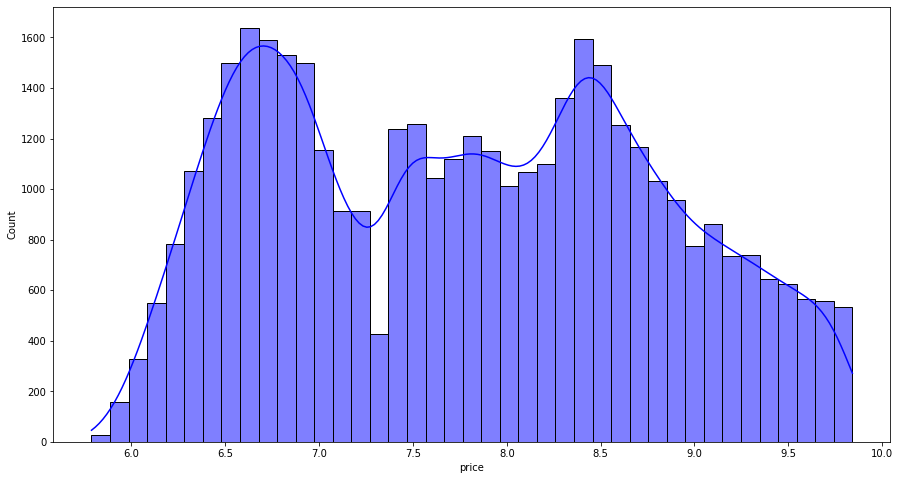

In [22]:
plt.figure(figsize=(15,8))
sns.histplot(df_train["price"], 
             kde = True, 
             color = "blue");

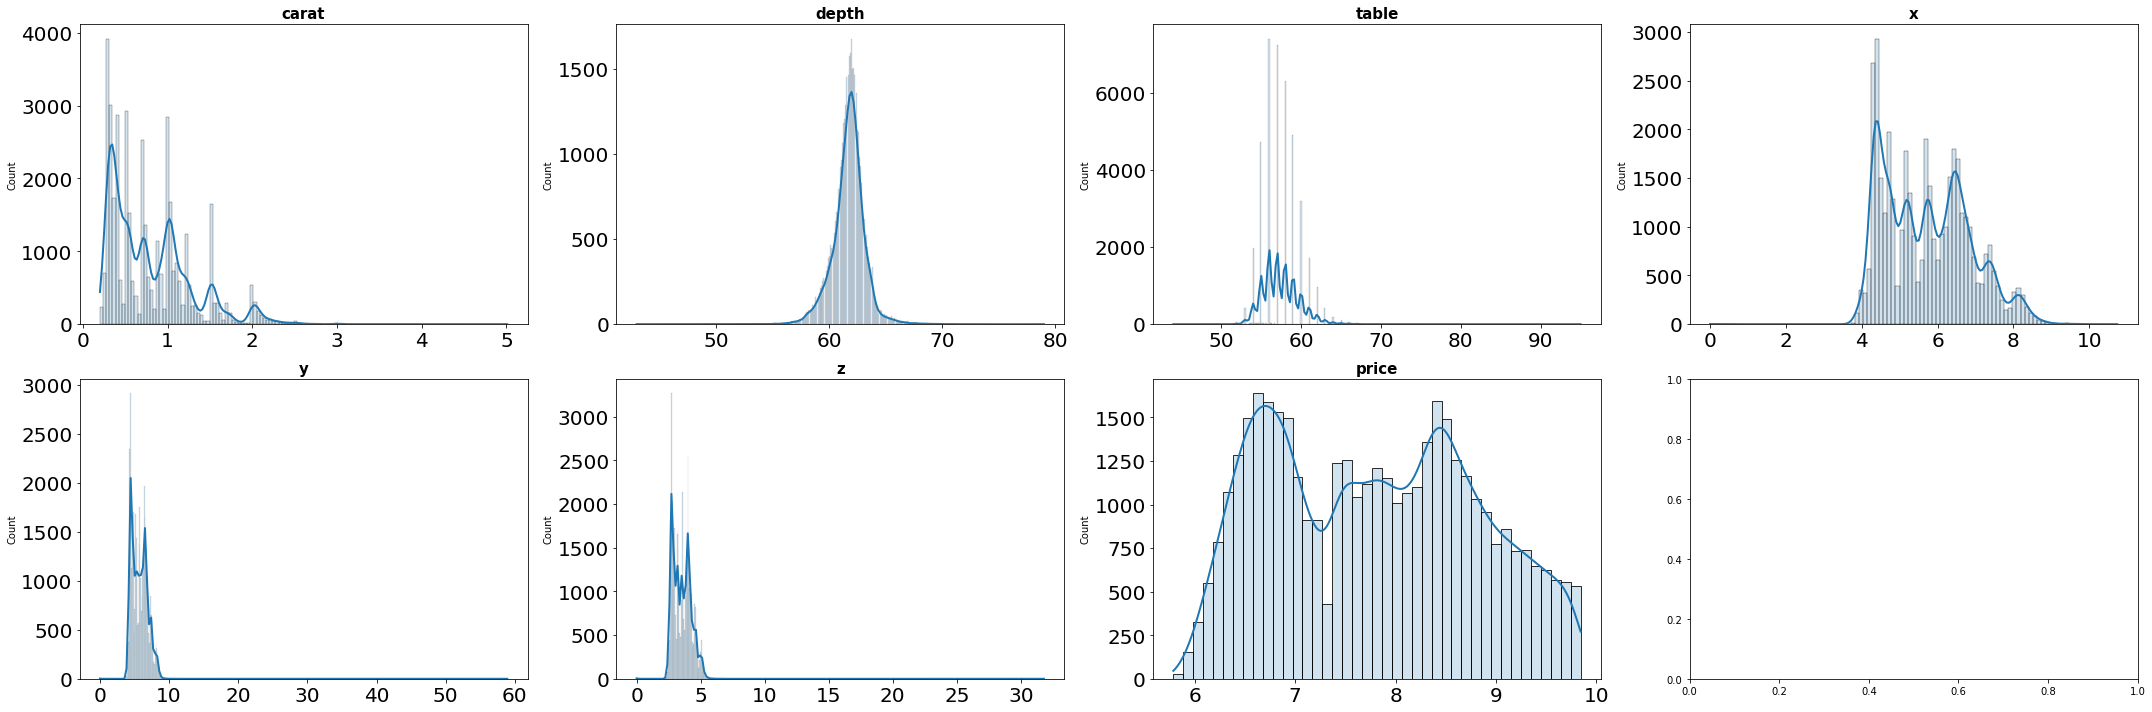

In [23]:
fig, axes = plt.subplots(nrows = 2, ncols = 4, figsize = (30, 10))

# lista_colores = ["blue", "green", "red", "cyan", "magenta", "orange"]

axes = axes.flat

columnas_numeric = df_train.select_dtypes(include = np.number).columns

for i, colum in enumerate(columnas_numeric[1:]): 
    sns.histplot(
        data = df_train,
        x = colum,
        kde = True, 
        line_kws = {"linewidth": 2}, 
        alpha = 0.2, 
        ax = axes[i])
    
    
    axes[i].set_title(colum, fontsize = 15, fontweight = "bold")
    axes[i].tick_params(labelsize = 20)
    axes[i].set_xlabel("")
    
# fig.delaxes(axes[0])

fig.tight_layout()

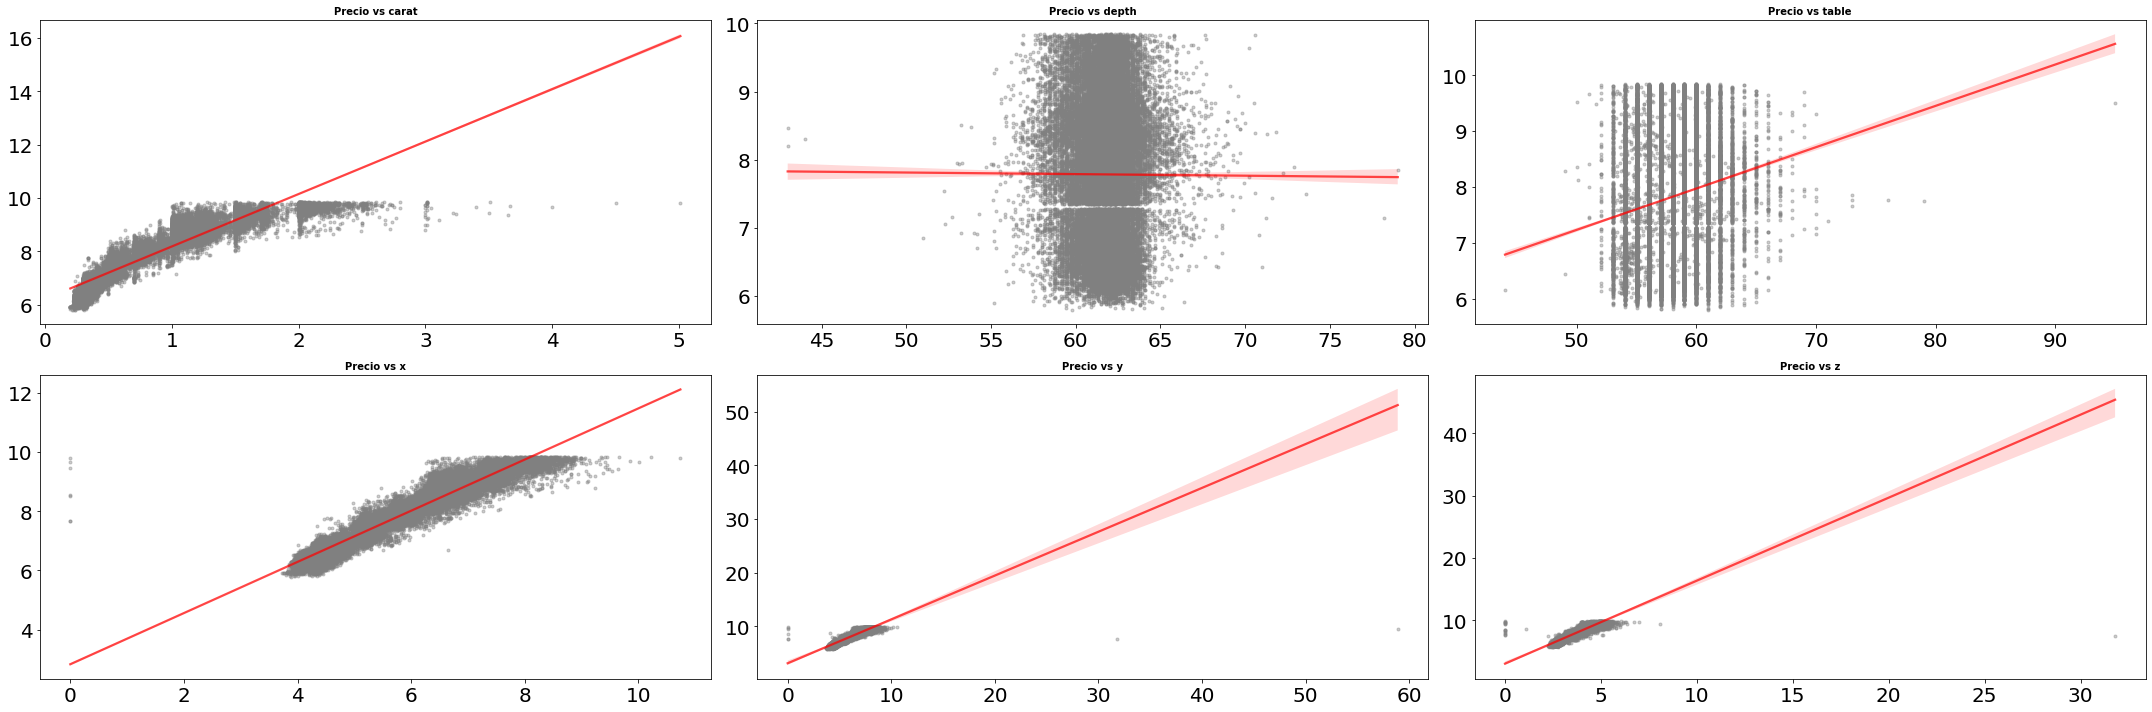

In [24]:
# Gráfico de relación entre variables predictoras y la variable a predecir
# ==============================================================================


fig, axes = plt.subplots(nrows = 2, ncols = 3, figsize = (30, 10))

lista_colores = ["blue", "green", "red", "cyan", "magenta", "orange"]

axes = axes.flat

columnas_numeric = df_train.select_dtypes(include = np.number).columns
columnas_numeric = columnas_numeric.drop("price")

for i, colum in enumerate(columnas_numeric[1:]):
    sns.regplot(
        x = df_train[colum], 
        y = df_train["price"], 
        color = "gray", 
        marker = ".", 
        scatter_kws = {"alpha": 0.4}, 
        line_kws = {"color": "red", "alpha": 0.7 }, 
        ax = axes[i])
    
    axes[i].set_title(f"Precio vs {colum}", fontsize = 10, fontweight = "bold")
    axes[i].tick_params(labelsize = 20)
    axes[i].set_xlabel("")
    axes[i].set_ylabel("")

# fig.delaxes(axes[0])
    
fig.tight_layout();

Se eliminaran las columnas de "depth" devido a la nula relación con "price" y "table", esta teniendo recalion con el precio pero sin una proporción demostrable y se pued aprecir una relación directa con "X", "y", "z", por lo cula no sera necesria.

In [25]:
df_train_ = df_train.copy()
df_train_ = df_train_[['id', 'carat', 'cut', 'color', 'clarity', 'x', 'y', 'z', 'price']]

<h2>Ordinalidad</h2>

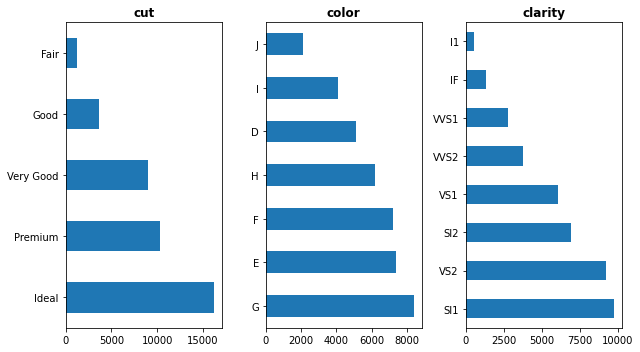

In [26]:
# Gráfico para cada variable cualitativa
# ==============================================================================

fig, axes = plt.subplots(1, 3, figsize = (9,5))

axes = axes.flat

columnas_object = df_train_.select_dtypes(include = "object").columns

for i, colum in enumerate(columnas_object):
    df_train[colum].value_counts().plot.barh(ax = axes[i])
    axes[i].set_title(colum, fontsize = 12, fontweight = "bold")
    axes[i].tick_params(labelsize = 10)
    axes[i].set_xlabel("")
    
fig.tight_layout();

In [27]:
df_train_["cut"].unique()

array(['Premium', 'Ideal', 'Very Good', 'Fair', 'Good'], dtype=object)

In [28]:
lista_val = ['Premium', 'Ideal', 'Very Good', 'Fair', 'Good']
sp.avg_val(df_train_, "cut", lista_val)


# ["Ideal", "Very Good", "Good", "Premium", "Fair"] Orden

Premium tiene un valor medio de: 7.96 USD
Ideal tiene un valor medio de: 7.64 USD
Very Good tiene un valor medio de: 7.79 USD
Fair tiene un valor medio de: 8.08 USD
Good tiene un valor medio de: 7.83 USD


In [29]:
df_train_["color"].unique()

array(['D', 'E', 'F', 'G', 'H', 'I', 'J'], dtype=object)

In [30]:
lista_val2 = ['D', 'E', 'F', 'G', 'H', 'I', 'J']
sp.avg_val(df_train_, "color", lista_val2)


# ["E", "D", "F", "G", "H", "I", "J"] Orden

D tiene un valor medio de: 7.62 USD
E tiene un valor medio de: 7.56 USD
F tiene un valor medio de: 7.76 USD
G tiene un valor medio de: 7.8 USD
H tiene un valor medio de: 7.91 USD
I tiene un valor medio de: 8.02 USD
J tiene un valor medio de: 8.15 USD


In [31]:
df_train_["clarity"].unique()

array(['SI2', 'VVS2', 'VS2', 'VS1', 'SI1', 'VVS1', 'IF', 'I1'],
      dtype=object)

In [32]:
lista_val3 = ['SI2', 'VVS2', 'VS2', 'VS1', 'SI1', 'VVS1', 'IF', 'I1']
sp.avg_val(df_train_, "clarity", lista_val3)


# ["VVS1", "IF", "VVS2", "VS1", "VS2", "SI1", "I1", "SI2"] Orden

SI2 tiene un valor medio de: 8.17 USD
VVS2 tiene un valor medio de: 7.53 USD
VS2 tiene un valor medio de: 7.76 USD
VS1 tiene un valor medio de: 7.72 USD
SI1 tiene un valor medio de: 7.84 USD
VVS1 tiene un valor medio de: 7.32 USD
IF tiene un valor medio de: 7.4 USD
I1 tiene un valor medio de: 8.03 USD


<h2>Correlación</h2>

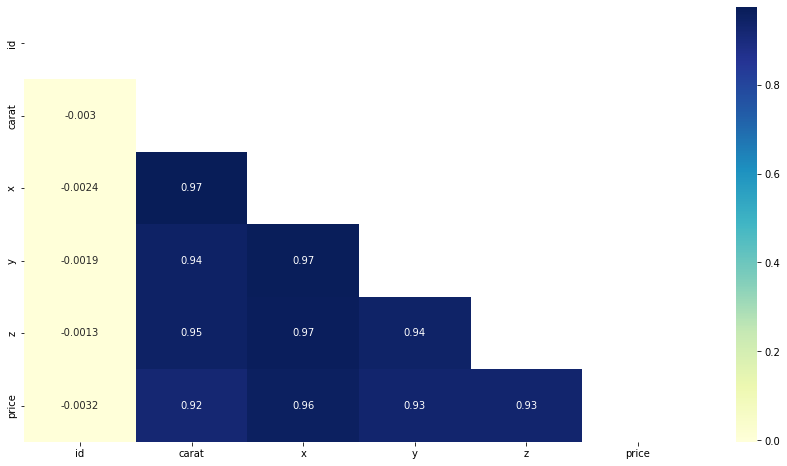

In [33]:
plt.figure(figsize=(15,8))
mask = np.triu(np.ones_like(df_train_.corr(), dtype = np.bool))

sns.heatmap(df_train_.corr(), 
           cmap = "YlGnBu", 
            mask = mask,
           annot = True)

plt.show();

Las columnas "x", "y", "z" denotan una relación directa con "carat" y esto es devido a que son formas diferentes de medir el tamaño del diamante, así que se puede prescindir de estas, pero primero seguiremos tratando estas para ver como se desarroya.

In [34]:
# df_train_1 = df_train_.copy()
# df_train_1 = df_train_[['id', 'carat', 'cut', 'color', 'clarity', 'price']]

<h2>Outliers</h2>

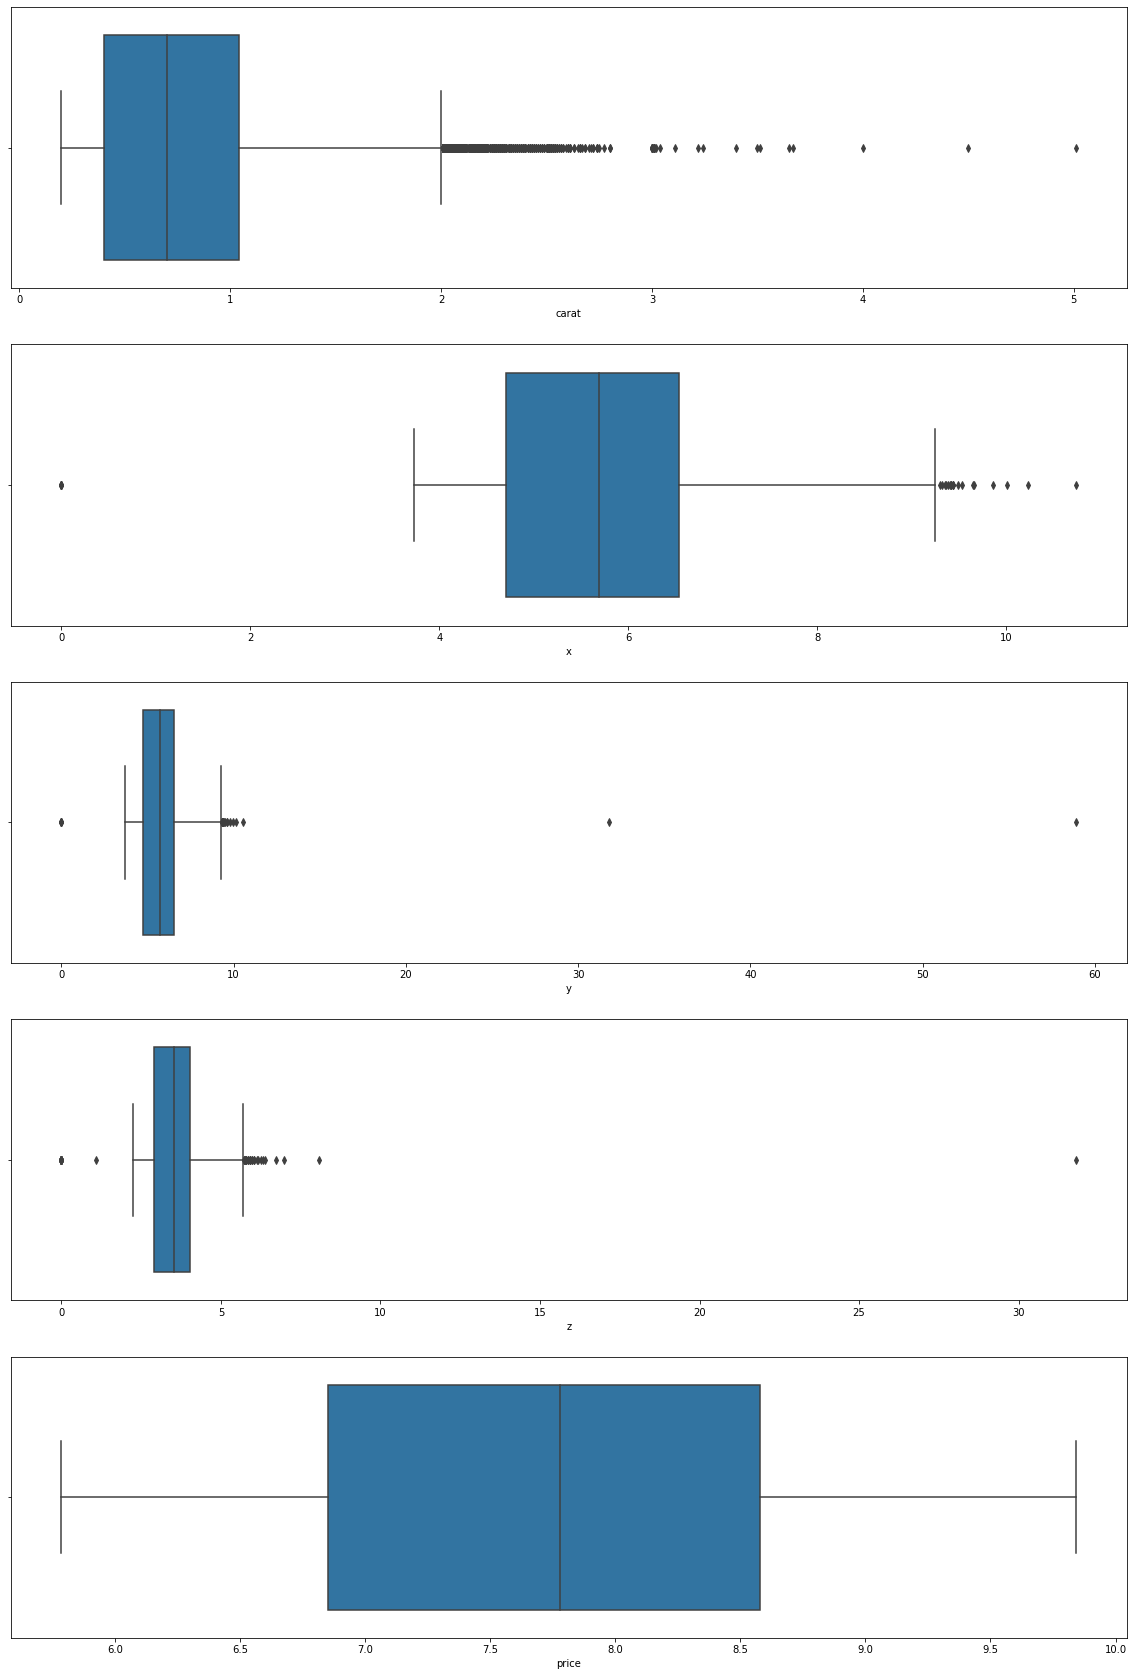

In [35]:
fig, ax = plt.subplots(5, 1, figsize=(20,30))

df_number = df_train_[['carat', 'x', 'y', 'z', 'price']]

for i in range(len(df_number.columns)):
    sns.boxplot(x = df_number.columns[i], data = df_number, ax = ax[i])
plt.show()

In [36]:
df_elim = df_train_[(df_train_["z"] == 0) | (df_train_["x"] == 0) | (df_train_["y"] == 0)]
df_elim.shape
# Se eleiminaran los que tengan un cero en cualquiere de sus medidad ya que no 
# tenemos otra manera de saber como serian y son pocos en proporcion a la acantidad de datos que tenemos.

(17, 9)

In [37]:
df_train2 = df_train_.copy()

In [38]:
df_train2.drop(df_elim.index, axis = 0, inplace = True)

In [39]:
df_train2.shape
# El número de filas del DF original era de 40455 con lo cula se han eliminado todas correctamente.

(40438, 9)

In [40]:
df_max = df_train[(df_train["color"] == "J") & (df_train["clarity"] == "SI2") & (df_train["cut"] == "Fair")]
df_max.shape

(19, 11)

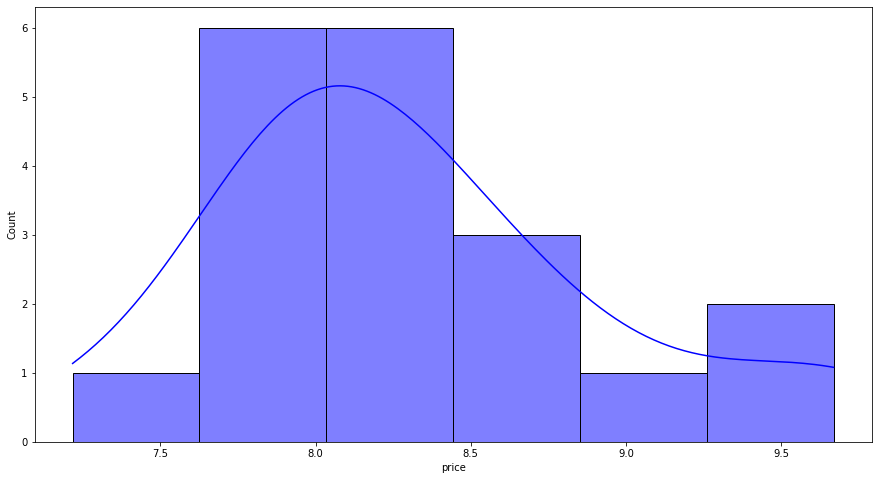

In [41]:
plt.figure(figsize=(15,8))
sns.histplot(df_max["price"], 
             kde = True, 
             color = "blue");

In [42]:
df_max["price"].sum()/df_max.shape[0]

8.308947368421052

In [43]:
df_train2["price"].max()

9.842

In [44]:
df_min = df_train[(df_train["color"] == "E") & (df_train["clarity"] == "VVS1") & (df_train["cut"] == "Ideal")]
df_min.shape

(257, 11)

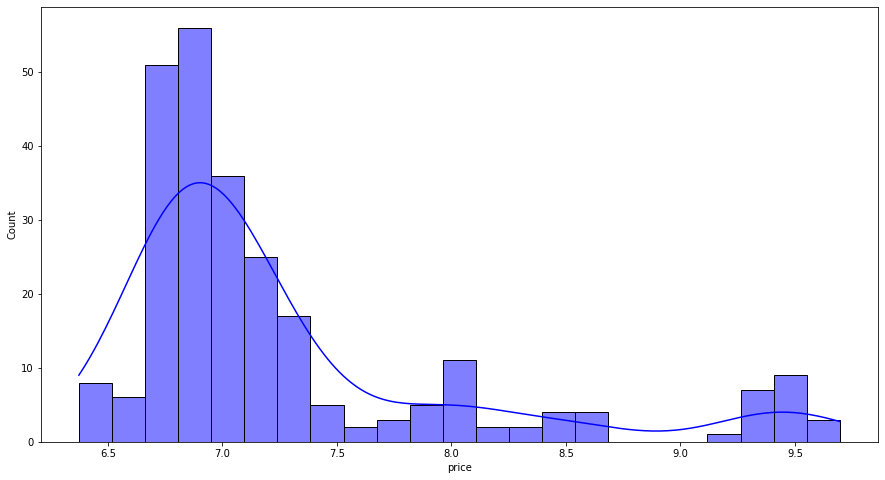

In [45]:
plt.figure(figsize=(15,8))
sns.histplot(df_min["price"], 
             kde = True, 
             color = "blue");

In [46]:
df_min["price"].sum()/df_min.shape[0]

7.273007782101168

In [47]:
df_train2["price"].min()

5.787

In [48]:
df_train2.to_csv("../data/train2.csv")